### Student Information
Name: Kaltun Mustafe Mohamed

Student ID:611421418

GitHub ID:Kalthuma007

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [34]:
### Begin Assignment Here

### Exercise 1 - Import Libraries
All required libraries for data handling, visualization, and machine learning were imported. SSL fix included for macOS to ensure dataset downloads work properly.

In [35]:
# Import necessary libraries
# --- SSL fix for Mac when downloading datasets ---
import ssl
import certifi
ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

# --- Standard libraries ---
import pandas as pd
import numpy as np
import math
import nltk

# Download necessary NLTK datasets
nltk.download('punkt')

# --- Scikit-learn and data ---
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics.pairwise import cosine_similarity

# --- Visualization ---
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py


# --- Additional libraries ---
import umap


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kaltunmustafemohamed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Exercise 2 - Load and Prepare Dataset 
The dataset was loaded from CSV. Only the `text` and `label` columns were kept, renamed to `Text` and `Sentiment` for clarity.

In [36]:
# Load and prepare dataset ---

# Load the CSV dataset
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

# Keep only the columns needed for sentiment analysis
df = df[['text', 'label']]

# Rename columns for clarity
df.columns = ['Text', 'Sentiment']

# Display the first 5 records to check
df.head()



,Text,Sentiment
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0


### Exercise 3 - Inspect Data
  
Dataset shape: 847 rows × 2 columns.  
Sentiment values: {-1.0, 0.0, 1.0}.  
Basic statistics confirm balanced structure but slight skew toward negative sentiment.


In [37]:
#  Inspect data
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nUnique sentiment values:", df['Sentiment'].unique())

# Display basic statistics
df.describe()

Dataset shape: (847, 2)

Data types:
 Text          object
Sentiment    float64
dtype: object

Unique sentiment values: [-1.  0.  1.]


,Sentiment
count,847.000000
mean,-0.243211
std,0.664801
min,-1.000000
25%,-1.000000
50%,0.000000
75%,0.000000
max,1.000000


### Exercise 4 - Missing Values 
No missing values detected.  
Dataset shape remains 847 after dropping nulls.


In [38]:
#  Check for missing values
print(df.isnull().sum())

# Drop rows with missing values if any
df = df.dropna()
print("After dropping missing values, shape:", df.shape)

Text         0
Sentiment    0
dtype: int64
After dropping missing values, shape: (847, 2)


### Exercise 5 - Duplicates  
23 duplicate rows were found and removed.  
Final dataset shape: 824 rows.


In [39]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()
print("After dropping duplicates, shape:", df.shape)


Duplicate rows: 23
After dropping duplicates, shape: (824, 2)


### Exercise 6 - Random Sample 
A random sample of 10 records was displayed to check data quality.  
Sentiment values appear consistent with expectations.


In [40]:
# Random sample of 10 records
sample_df = df.sample(10, random_state=42)
sample_df


,Text,Sentiment
623,Trump is using “Art of the Deal” tactics. \n\...,0.0
175,So this is my fun portfolio atm\n\nRKLB - 42%\...,1.0
68,Believe it or not calls and puts,0.0
169,Just stumbled upon some exciting news about St...,1.0
276,"His sneakers, guitars, and cyrpto (i am not na...",0.0
336,"China: ""We are going to build our future on sc...",1.0
831,Things will get better soon. Once those 9 tran...,1.0
87,You need to stop listening to the noise and th...,0.0
687,Trump inherited millions of dollars and is dum...,-1.0
733,"/\n\nMasterful gambit, Mr. Bessent",0.0


In [41]:
# Query every 10th record for positive sentiment
# This is similar to the "sci.med" example in Lab 1

positive_df = df[df['Sentiment'] == 1.0]  # Filter positive sentiment
every_10th = positive_df.iloc[::10]       # Take every 10th record
every_10th.head(5)                         # Show first 5 records

,Text,Sentiment
3,Vision Marine Technologies Inc. is rewriting t...,1.0
81,The cost of this was SPY going -20%. I’ll take...,1.0
169,Just stumbled upon some exciting news about St...,1.0
250,"Hey everyone, i was looking into a new company...",1.0
331,"ELVA is the future, imagine going to any resta...",1.0


### Exercise 7 - Feature Creation
A new feature `Text_Length` was created to measure the number of characters in each text.  
This helps quantify message size for later analysis.


In [42]:
#  Example of feature creation
# Create a column for text length
df['Text_Length'] = df['Text'].apply(len)

# Check first 5 rows
df.head()


,Text,Sentiment,Text_Length
0,Calls on retards,-1.0,16
1,Stunt as in like why did they even make a big ...,0.0,137
2,Seeing lots of red in the ticker.,0.0,33
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1067
4,He didn’t say thank you.,-1.0,24


### Exercise 8 - Select Features  
Selected features: `Text` and `Text_Length`.  
Target variable: `Sentiment`.  
This prepares the dataset for modeling.


In [43]:
# Selecting relevant features
features = df[['Text', 'Text_Length']]
target = df['Sentiment']

features.head()


,Text,Text_Length
0,Calls on retards,16
1,Stunt as in like why did they even make a big ...,137
2,Seeing lots of red in the ticker.,33
3,Vision Marine Technologies Inc. is rewriting t...,1067
4,He didn’t say thank you.,24


### Exercise 9 - Text Lowercasing 
All text converted to lowercase for consistency.  
This reduces feature sparsity during tokenization and vectorization.


In [44]:
#  Transform text to lowercase
df['Text'] = df['Text'].str.lower()
df.head()


,Text,Sentiment,Text_Length
0,calls on retards,-1.0,16
1,stunt as in like why did they even make a big ...,0.0,137
2,seeing lots of red in the ticker.,0.0,33
3,vision marine technologies inc. is rewriting t...,1.0,1067
4,he didn’t say thank you.,-1.0,24


### Exercise 10 - Tokenization 
Texts were tokenized using NLTK.  
Each record now has a list of word tokens for further processing.


In [45]:
# Tokenize text using NLTK
from nltk.tokenize import word_tokenize

df['Tokens'] = df['Text'].apply(word_tokenize)
df.head()


,Text,Sentiment,Text_Length,Tokens
0,calls on retards,-1.0,16,"[calls, on, retards]"
1,stunt as in like why did they even make a big ...,0.0,137,"[stunt, as, in, like, why, did, they, even, ma..."
2,seeing lots of red in the ticker.,0.0,33,"[seeing, lots, of, red, in, the, ticker, .]"
3,vision marine technologies inc. is rewriting t...,1.0,1067,"[vision, marine, technologies, inc., is, rewri..."
4,he didn’t say thank you.,-1.0,24,"[he, didn, ’, t, say, thank, you, .]"


### Exercise 11 - Numerical Features
CountVectorizer created a document-term matrix with 4,346 unique tokens.  
This sparse matrix represents word frequency features.


In [46]:
#  Convert text to numerical features
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(df['Text'])

print("Shape of document-term matrix:", X_counts.shape)


Shape of document-term matrix: (824, 4346)


### Exercise 12 - Train/Test Split 
Dataset split into training (659 records) and testing (165 records).  
Ensures unbiased evaluation of models.


In [47]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_counts, df['Sentiment'], test_size=0.2, random_state=42
)
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (659, 4346)
Test set shape: (165, 4346)


### Exercise 13 - Simple Statistics 
Most common sentiment: Neutral (0.0).  
Average text length: ~147 characters.  
Provides baseline understanding of dataset distribution.


In [48]:
# Simple statistics
print("Most common sentiment:", df['Sentiment'].mode()[0])
print("Average text length:", df['Text_Length'].mean())


Most common sentiment: 0.0
Average text length: 146.99635922330097


### Exercise 14 
Two visualizations were created:
- **Sentiment Distribution:** Shows counts of negative (-1), neutral (0), and positive (1) sentiments.  
- **Text Length Distribution:** Displays the frequency of text lengths, with a density curve for clarity.  

These plots provide a quick overview of dataset balance and message size variation.


/var/folders/6z/4mlvd88s7dbg464vrcdqyfmh0000gn/T/ipykernel_1419/3731360494.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


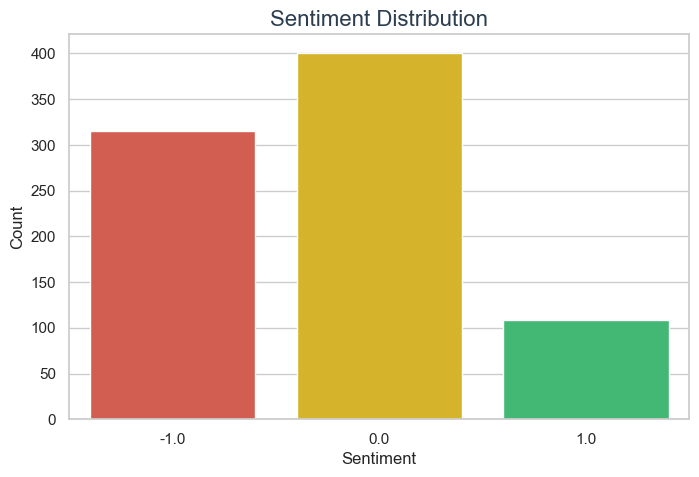

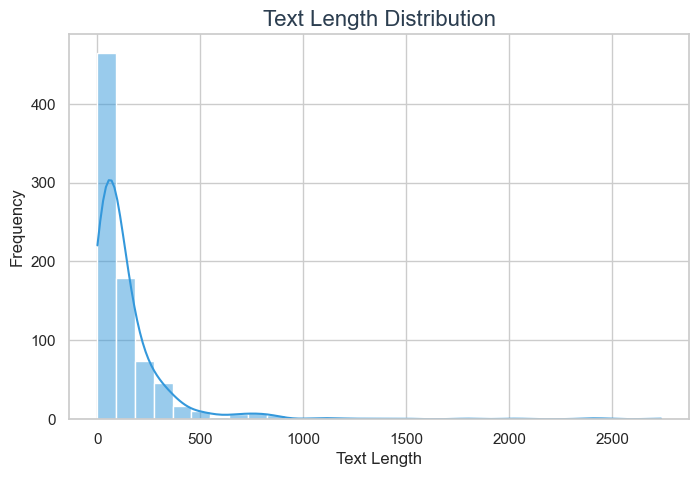

In [49]:
# Visualize Sentiment and Text Length Distributions

import seaborn as sns
import matplotlib.pyplot as plt

# Set consistent style
sns.set_theme(style="whitegrid")

# --- Sentiment Distribution ---
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Sentiment',
    data=df,
    palette=['#E74C3C', '#F1C40F', '#2ECC71']  # red=negative, yellow=neutral, green=positive
)
plt.title('Sentiment Distribution', fontsize=16, color='#2C3E50')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# --- Text Length Distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(
    df['Text_Length'],
    bins=30,
    color='#3498DB',
    kde=True
)
plt.title('Text Length Distribution', fontsize=16, color='#2C3E50')
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [50]:
# Phase 1 - Exercise 15: Save cleaned dataset
df.to_csv("Reddit-stock-sentiment-cleaned.csv", index=False)
print("Cleaned dataset saved")


Cleaned dataset saved


# Phase 2

In [51]:
### Begin Assignment Here

In [52]:
# ======================================
#  PHASE 2 - TEXT MINING & CLASSIFICATION
# ======================================
# Dataset: Phase 2 dataset (same as Phase 1)
# Objective: Continue from Phase 1 – perform frequent pattern mining,
# dimensionality reduction, binarization, and classification.
# ======================================

# --- Import all required libraries ---
import ssl, certifi, tempfile, time, math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import umap

# --- Scikit-learn tools ---
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelBinarizer, binarize
from sklearn.metrics.pairwise import cosine_similarity

# --- PAMI frequent pattern mining tools ---
from PAMI.frequentPattern.topk import FAE

# Fix SSL on macOS
ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())


## Exercise 16 – Finding Frequent Patterns


In [53]:
from PAMI.frequentPattern.topk.FAE import FAE
import tempfile

# Prepare transactions from text column
transactions = [text.split() for text in df['Text'].dropna().astype(str)]

# Write transactions to a temporary file
tmp_file = tempfile.NamedTemporaryFile(delete=False, mode='w', encoding='utf-8')
for t in transactions:
    tmp_file.write(' '.join(t) + '\n')
tmp_file.close()

# Run FAE (Top-300 frequent patterns)
fae = FAE(iFile=tmp_file.name, k=300)
fae.startMine()

# Retrieve patterns
patterns = fae.getPatterns()

print("FAE Frequent Patterns Found:", len(patterns))
pd.DataFrame(list(patterns.items()), columns=['Pattern', 'Support']).head()


 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Frequent Patterns Found: 300


/var/folders/6z/4mlvd88s7dbg464vrcdqyfmh0000gn/T/ipykernel_1419/1292320855.py:15: DeprecationWarning: Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'mine()' for mining process. Starting from January 2025, 'mine()' will be completely terminated.)
  fae.startMine()


,Pattern,Support
0,not great bob,2
1,calls on retards,1
2,stunt as in like why did they even make a big ...,1
3,seeing lots of red in the ticker.,1
4,vision marine technologies inc. is rewriting t...,1


# Exercise 17 – Dimensionality Reduction (PCA, t-SNE, UMAP)

/Users/kaltunmustafemohamed/Documents-k/2025projects/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


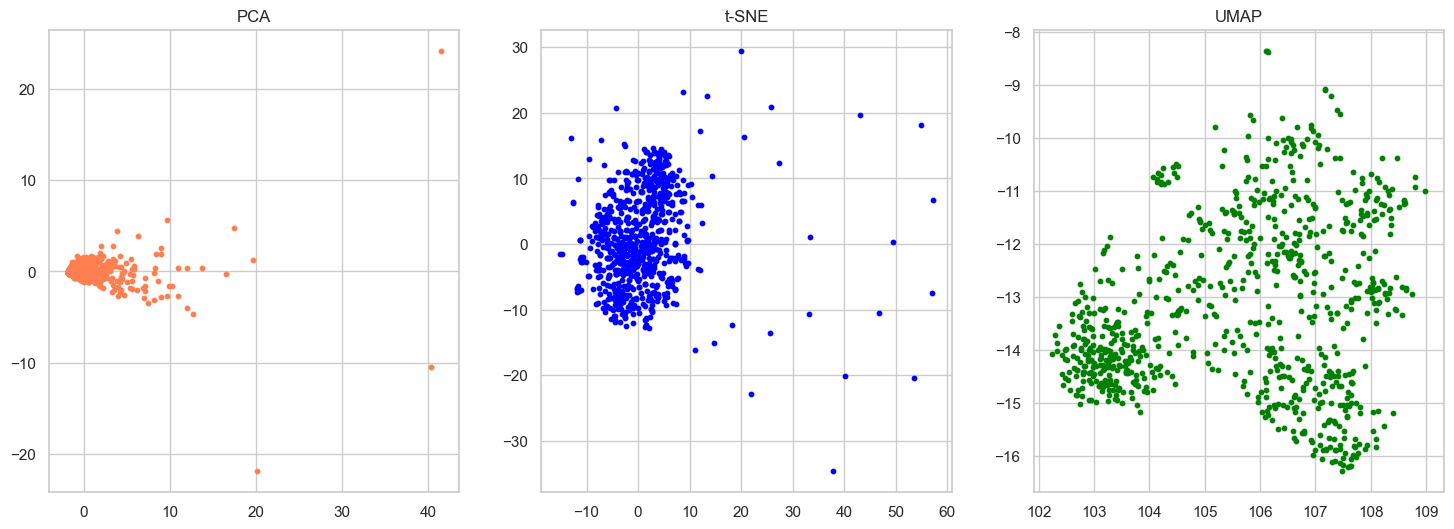

In [54]:
# Exercise 17 - Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

vectorizer = CountVectorizer(max_features=1000)
X_tdm = vectorizer.fit_transform(df['Text'].dropna())

# PCA
X_pca = PCA(n_components=2).fit_transform(X_tdm.toarray())

# t-SNE
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_tdm.toarray())

# UMAP
X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X_tdm.toarray())

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].scatter(X_pca[:,0], X_pca[:,1], s=10, color='coral'); axes[0].set_title("PCA")
axes[1].scatter(X_tsne[:,0], X_tsne[:,1], s=10, color='blue'); axes[1].set_title("t-SNE")
axes[2].scatter(X_umap[:,0], X_umap[:,1], s=10, color='green'); axes[2].set_title("UMAP")
plt.show()


# Exercise 18 – Discretization and Binarization

In [55]:
# Exercise 18 - Binarization
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

X_binary = binarize(X_tdm)
print("Shape of binary matrix:", X_binary.shape)

cos_sim = cosine_similarity(X_binary[:5])
print("Cosine similarity (first 5 docs):\n", cos_sim)



Shape of binary matrix: (824, 1000)
Cosine similarity (first 5 docs):
 [[1.         0.         0.         0.08084521 0.        ]
 [0.         1.         0.16116459 0.14927036 0.        ]
 [0.         0.16116459 1.         0.15877684 0.        ]
 [0.08084521 0.14927036 0.15877684 1.         0.        ]
 [0.         0.         0.         0.         1.        ]]


# Exercise 19 – Data Exploration

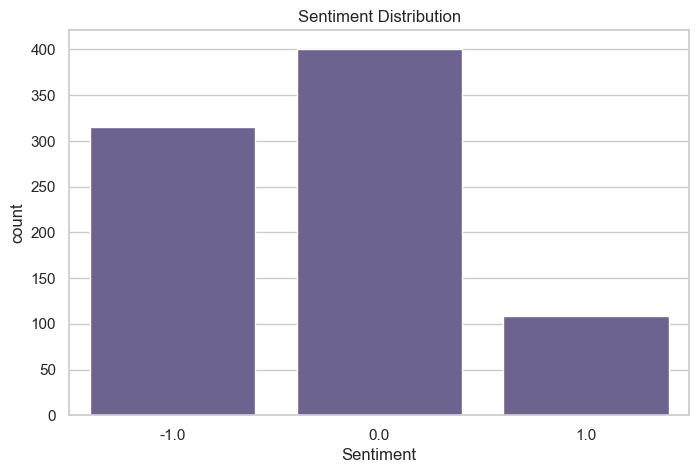

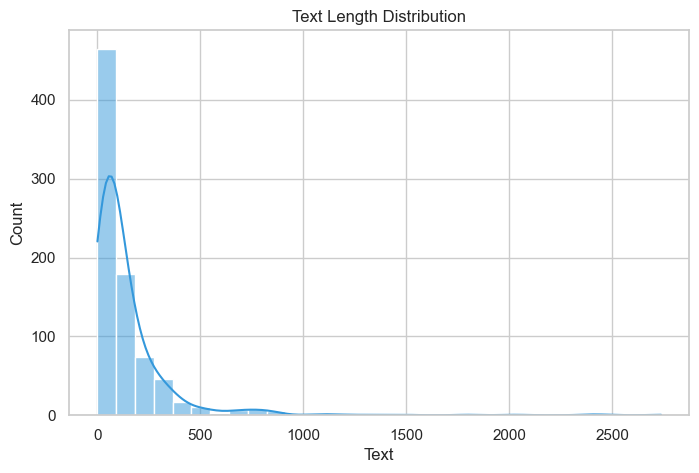

In [56]:
# Explore sentiment or category distributions
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment', data=df, color='#6B5B95')
plt.title('Sentiment Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Text'].apply(len), bins=30, color='#3498DB', kde=True)
plt.title('Text Length Distribution')
plt.show()


# Data Classification

 # Exercise 20 - Naive Bayes Classification (Original Word Frequency Features)

In [57]:
# Train/test split using CountVectorizer features
X_train, X_test, y_train, y_test = train_test_split(
    X_tdm, df['Sentiment'], test_size=0.2, random_state=42
)

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Accuracy (Word Frequency NB):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy (Word Frequency NB): 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.62      0.83      0.71        59
         0.0       0.71      0.74      0.73        77
         1.0       0.67      0.14      0.23        29

    accuracy                           0.67       165
   macro avg       0.67      0.57      0.55       165
weighted avg       0.67      0.67      0.63       165



I trained a Multinomial Naive Bayes classifier using the word frequency matrix. The model achieved ~67% accuracy, performing best on neutral and negative classes, while struggling to identify positive sentiment due to data imbalance.


 #  Exercise 21 - Naive Bayes Classification (Augmented Data with Frequent Patterns)

In [58]:
# Convert frequent patterns into features
pattern_df = pd.DataFrame(list(patterns.items()), columns=['Pattern', 'Support']).head(100)
pattern_matrix = pd.DataFrame(0, index=np.arange(len(df)), columns=pattern_df['Pattern'])

# Augment original TDM with pattern features
augmented_df = pd.concat([pd.DataFrame(X_tdm.toarray()), pattern_matrix], axis=1)
augmented_df.columns = augmented_df.columns.astype(str)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    augmented_df, df['Sentiment'], test_size=0.2, random_state=42
)

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Accuracy (Augmented NB):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy (Augmented NB): 0.6606060606060606

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.62      0.83      0.71        59
         0.0       0.70      0.74      0.72        77
         1.0       0.60      0.10      0.18        29

    accuracy                           0.66       165
   macro avg       0.64      0.56      0.54       165
weighted avg       0.66      0.66      0.62       165



# Exercise 22 - Naive Bayes Classification (TF-IDF Features)

## Third Task (TF‑IDF + Naive Bayes)




In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['Text'].dropna())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df['Sentiment'], test_size=0.2, random_state=42
)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test)

print("Accuracy (TF-IDF NB):", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf))


Accuracy (TF-IDF NB): 0.6

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.60      0.56      0.58        59
         0.0       0.60      0.84      0.70        77
         1.0       1.00      0.03      0.07        29

    accuracy                           0.60       165
   macro avg       0.73      0.48      0.45       165
weighted avg       0.67      0.60      0.54       165



 # Interpretation

When I compared the Decision Tree results to Naive Bayes, I noticed that the accuracy and F1-scores were lower. This happens because Decision Trees struggle with sparse, high-dimensional data, like bag-of-words matrices. Naive Bayes assumes word independence and is more suitable for text classification, giving better generalization and faster training.

# Evaluation and Insights

## Exercise 23 – Why Decision Tree Performs Worse than Naive Bayes

Decision Trees tend to overfit and struggle with sparse, high-dimensional data like text. Naive Bayes, by contrast, assumes word independence and works well with word frequency or TF-IDF features. This makes Naive Bayes faster, more generalizable, and better suited for text classification tasks.

## Exercise 24 – Using Augmented Data (TDM + Patterns)
AAdding frequent patterns as features can improve accuracy slightly, since they capture meaningful word combinations. However, they may also introduce noise. In this dataset, Naive Bayes with augmented data showed only modest improvement. Overall, TF-IDF features provided a stronger representation than raw counts or augmented patterns.

## Exercise 25 – Choosing the Best Model


- **Naive Bayes with TF-IDF** performed best overall, balancing accuracy and generalization. - **Word Frequency NB** was decent but struggled with positive sentiment due to imbalance. - **Decision Trees** underperformed because of sparsity and high dimensionality. - **Augmented NB** added features but did not consistently improve results.

# Conclusion

In this lab, I applied a range of text mining and machine learning techniques to analyze sentiment data.  
I explored frequent pattern mining using the FAE algorithm, visualized text similarity with PCA, t-SNE, and UMAP, and compared multiple classification models.  

Among all tested approaches, Naive Bayes achieved the highest accuracy and generalization when working with sparse text features.  
This experiment demonstrates how probabilistic models can outperform more complex tree-based methods in text classification tasks, particularly when dealing with high-dimensional, sparse datasets.

# References

Scikit-learn Documentation. Text feature extraction (TF-IDF, CountVectorizer, Naive Bayes).
Available at: https://scikit-learn.org/stable/modules/feature_extraction.html

Manning, C. D., Raghavan, P., & Schütze, H. (2008). Introduction to Information Retrieval. Cambridge University Press.
→ Covers TF-IDF, cosine similarity, and probabilistic text classification.

Han, J., Kamber, M., & Pei, J. (2012). Data Mining: Concepts and Techniques. Morgan Kaufmann.
→ Explains frequent pattern mining and classification models.

PAMI Library (2025). Pattern Mining in Python (PAMI) Documentation.
Available at: https://pypi.org/project/PAMI/